# BFGS Experimental Notebook

## Setup

### Imports

In [1]:
import numpy as np
from numpy import linalg as la
from bfgs_funcs import Funcs
from bfgs import BFGS
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Data Generation

#### Generate Square matrices by Condition Number

In [2]:
def get_data_by_cond(cond_num=1e-18, n=1000):
    cond_num = 1e-18     # Condition number
    log_cond_num = np.log(cond_num)
    exp_vec = np.arange(-log_cond_num/4., log_cond_num * (n )/(4 * (n - 1)), log_cond_num/(2.*(n-1)))
    s = np.exp(exp_vec)
    S = np.diag(s)
    U, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
    V, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
    matrix = U.dot(S).dot(V.T)
    matrix = matrix.dot(matrix.T) / 1e7

    vector = np.round(np.random.randn(n),decimals = 3)
    
    return matrix, vector

In [14]:
SM_1, SV_1 = get_data_by_cond(cond_num=1e-18) # Square Matrix and "Square" Vector

In [4]:
SM_2, SV_2 = get_data_by_cond(cond_num=1e-10) 

In [5]:
SM_3, SV_3 = get_data_by_cond(cond_num=1e-5) 

In [6]:
SM_4, SV_4 = get_data_by_cond(cond_num=1) 

#### Generate Random Rectangular matrices

In [7]:
def get_data(n, m):
    matrix = np.random.randn(n, m)
    vector = np.round(np.random.randn(m),decimals = 3)
    return matrix, vector

In [37]:
RM_1, RV_1 = get_data(1000, 100) # Rectangular Matrix and "Rectangular" Vector

In [38]:
RM_2, RV_2 = get_data(10000, 100) # Rectangular Matrix and "Rectangular" Vector

In [40]:
RM_3, RV_3 = get_data(1000, 1000) # Rectangular Matrix and "Rectangular" Vector

In [41]:
RM_4, RV_4 = get_data(10000, 1000) # Rectangular Matrix and "Rectangular" Vector

## Baseline Performance

In [12]:
def test_bfgs(matrix, vector, method='O', verbose=False):
    
    funcs = Funcs(matrix)
    B0 = np.identity(vector.shape[0])

    bfgs = BFGS(funcs.func_, funcs.func_grad_,None, vector, B0, tol=1e-5, max_iter=1000, method=method, verboose=verbose)

    # Run the algorithm.
    residual, errors, result = bfgs.bfgs()
    fig = make_subplots(rows=1, cols=2,
        shared_xaxes=False)

    fig.add_trace(
        go.Scatter(x=list(range(0,len(errors))), y=errors,name="Errors"),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=list(range(0,len(residual))), y=residual,name="Residuals"),
        row=1, col=2
    )
    fig.update_xaxes(title_text="Iterations", row=1, col=1)
    fig.update_yaxes(title_text="Error", row=1, col=1)
    fig.update_xaxes(title_text="Iterations", row=1, col=2)
    fig.update_yaxes(title_text="Residual", row=1, col=2)
    fig.update_layout(height=500, width=1000,title_text="Residual and Error plot")
    fig.show()

### Original BFGS

BFGS did converge


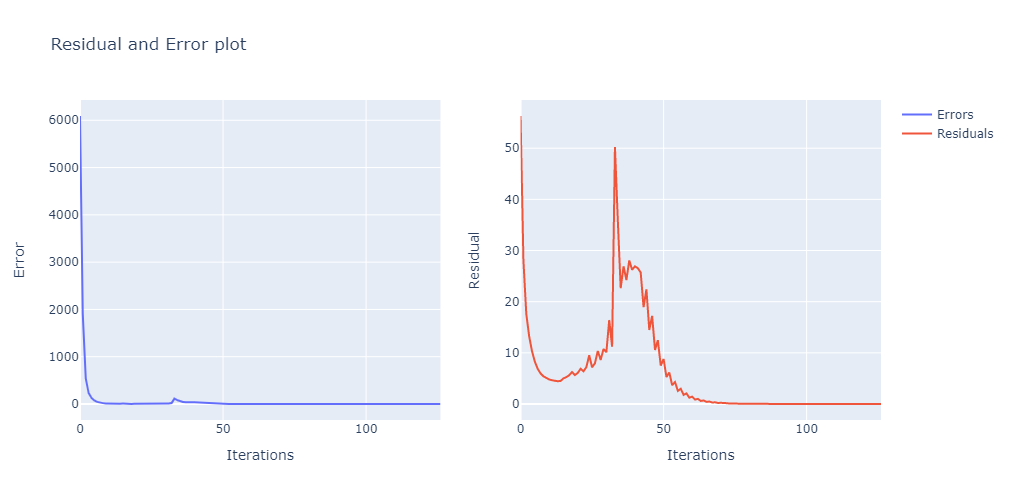

In [19]:
test_bfgs(SM_1, SV_1, method='O', verbose=False)

BFGS did converge


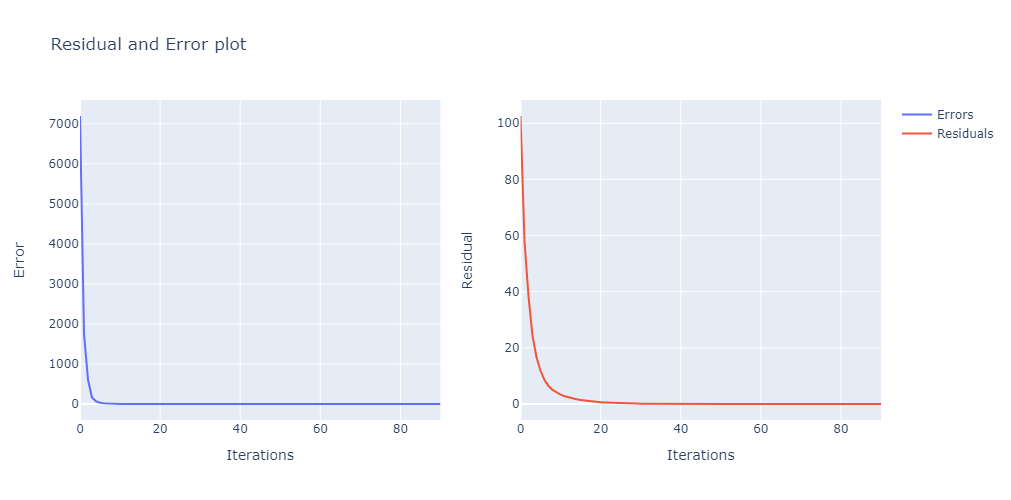

In [20]:
test_bfgs(SM_2, SV_2, method='O', verbose=False)

BFGS did converge


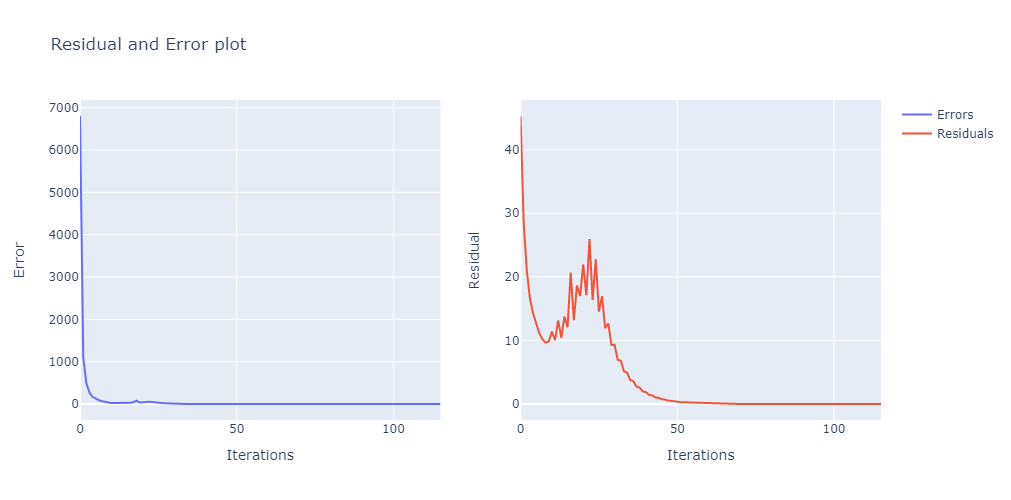

In [21]:
test_bfgs(SM_3, SV_3, method='O', verbose=False)

BFGS did converge


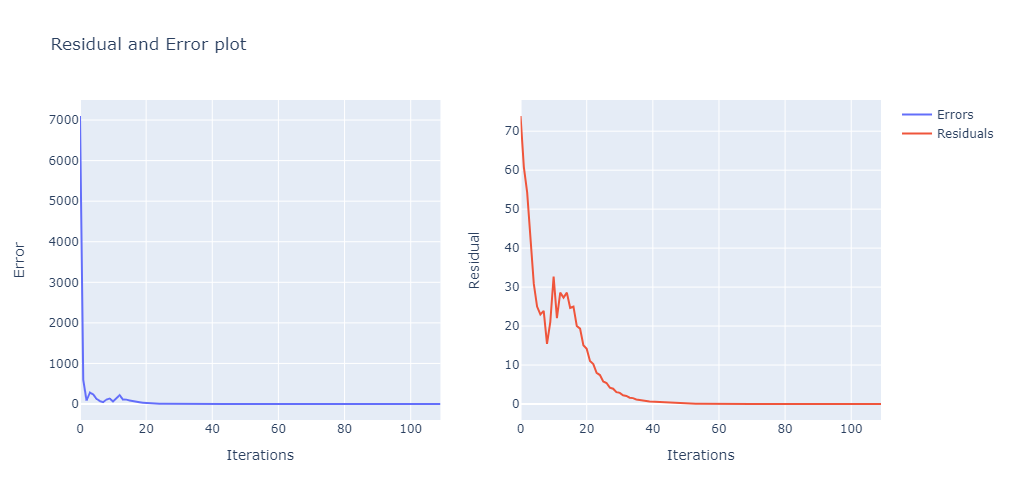

In [22]:
test_bfgs(SM_4, SV_4, method='O', verbose=False)

BFGS did not converge


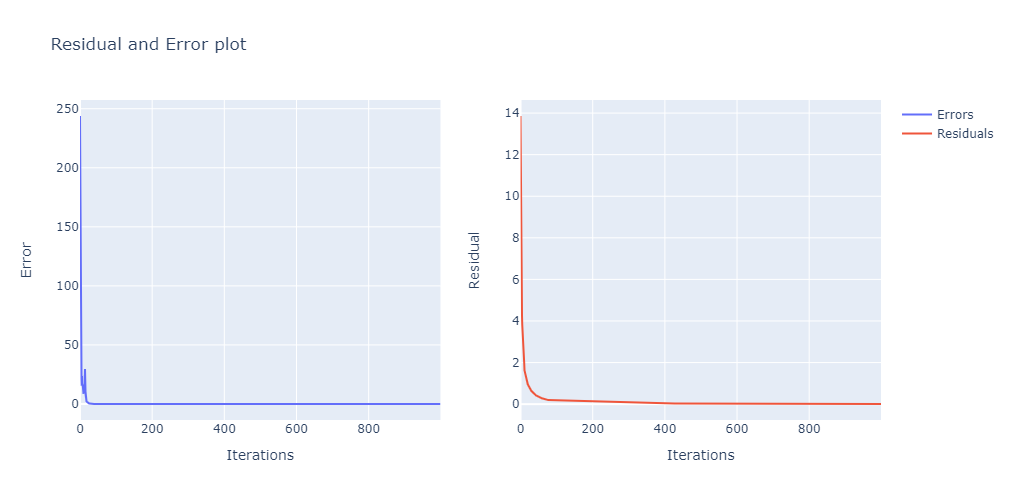

In [42]:
test_bfgs(RM_1, RV_1, method='O', verbose=False)

BFGS did not converge


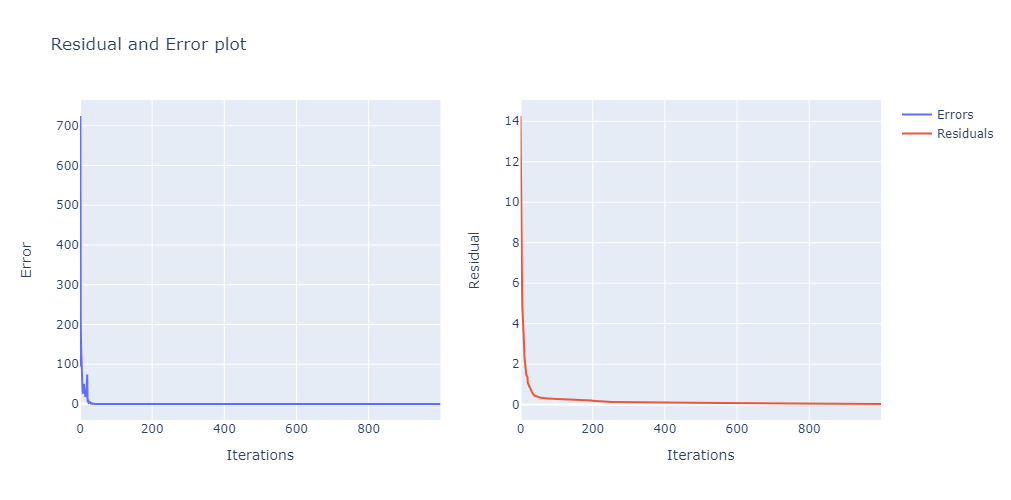

In [43]:
test_bfgs(RM_2, RV_2, method='O', verbose=False)

BFGS did not converge


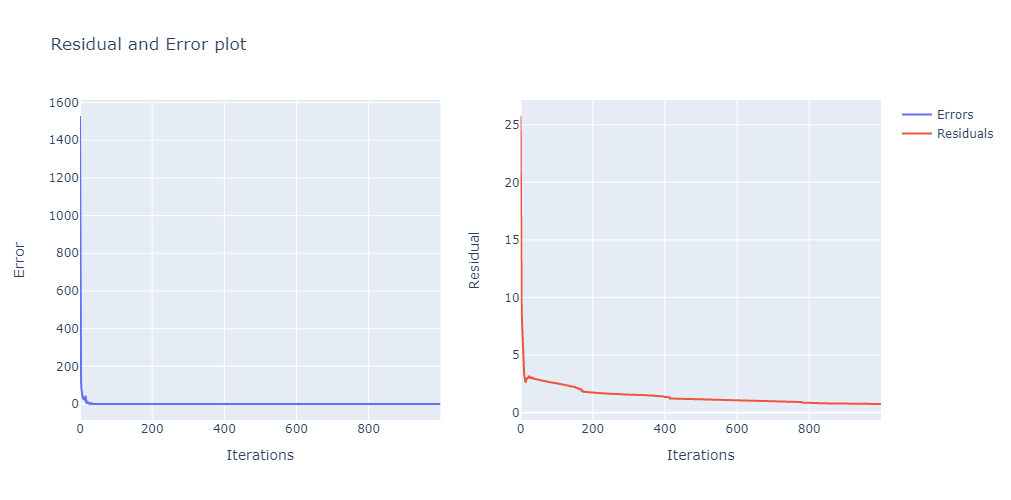

In [44]:
test_bfgs(RM_3, RV_3, method='O', verbose=False)

BFGS did not converge


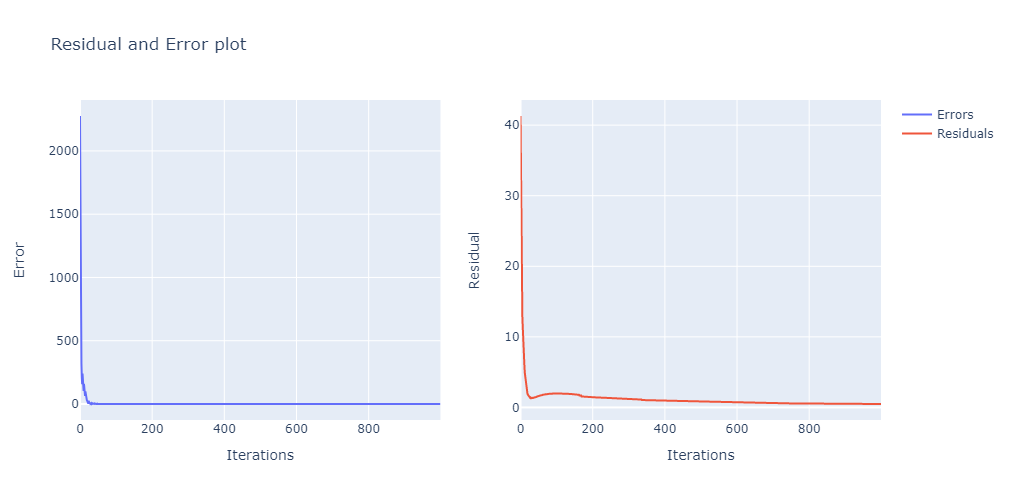

In [45]:
test_bfgs(RM_4, RV_4, method='O', verbose=False)

### Cautious BFGS

BFGS did converge


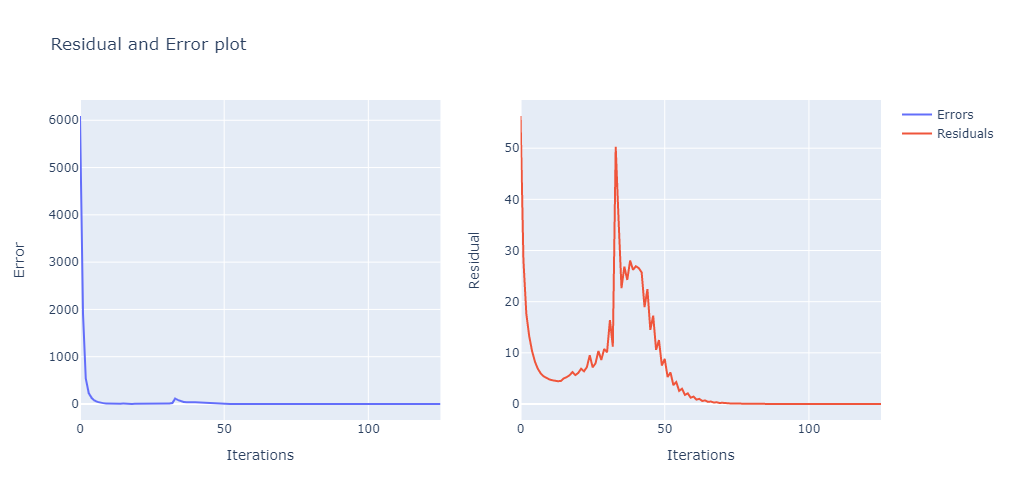

In [25]:
test_bfgs(SM_1, SV_1, method='C', verbose=False)

BFGS did converge


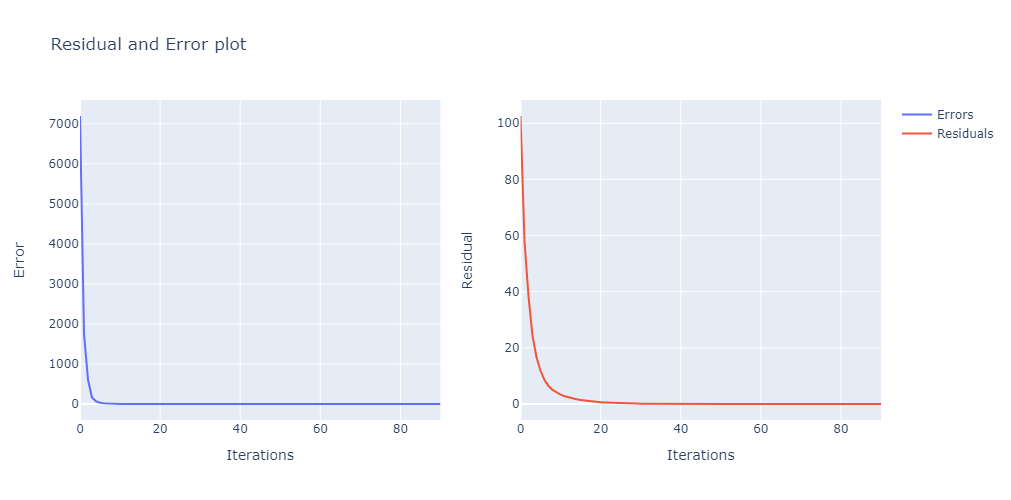

In [26]:
test_bfgs(SM_2, SV_2, method='C', verbose=False)

BFGS did converge


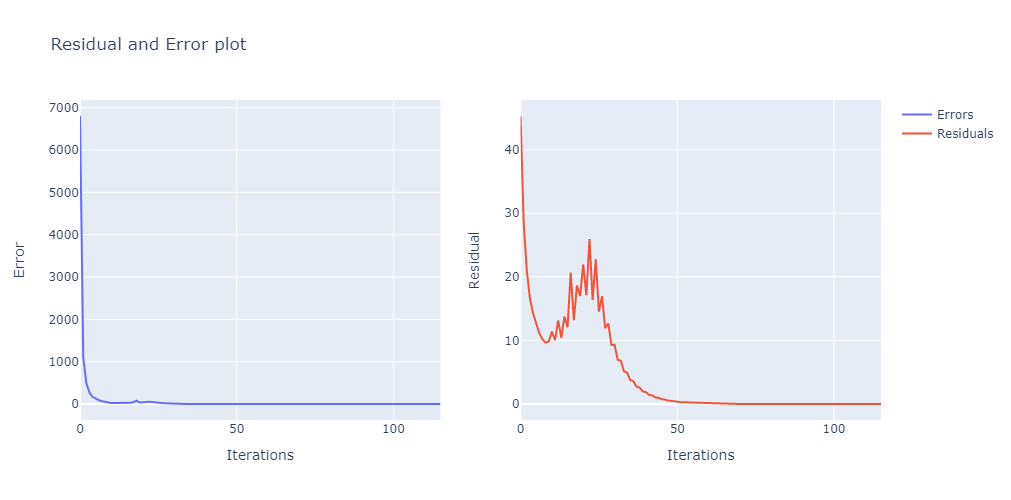

In [27]:
test_bfgs(SM_3, SV_3, method='C', verbose=False)

BFGS did converge


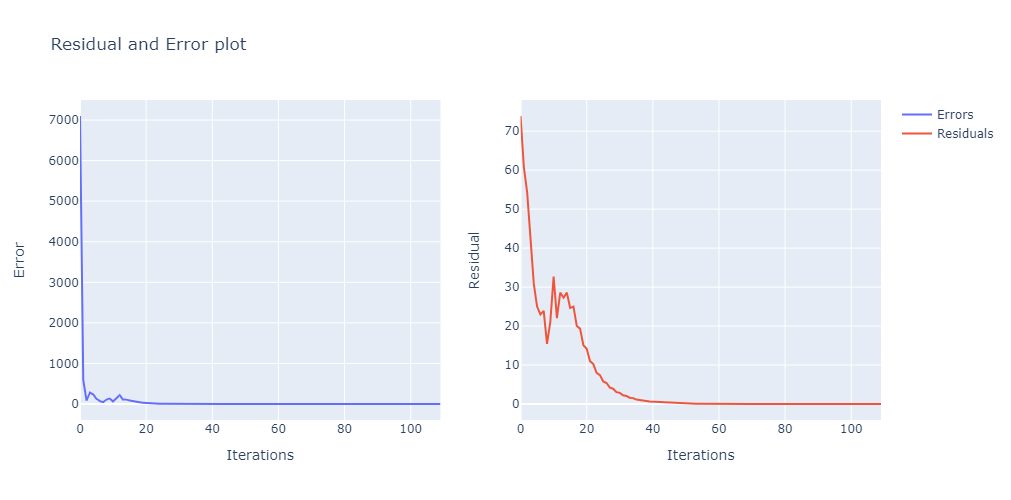

In [28]:
test_bfgs(SM_4, SV_4, method='C', verbose=False)

BFGS did not converge


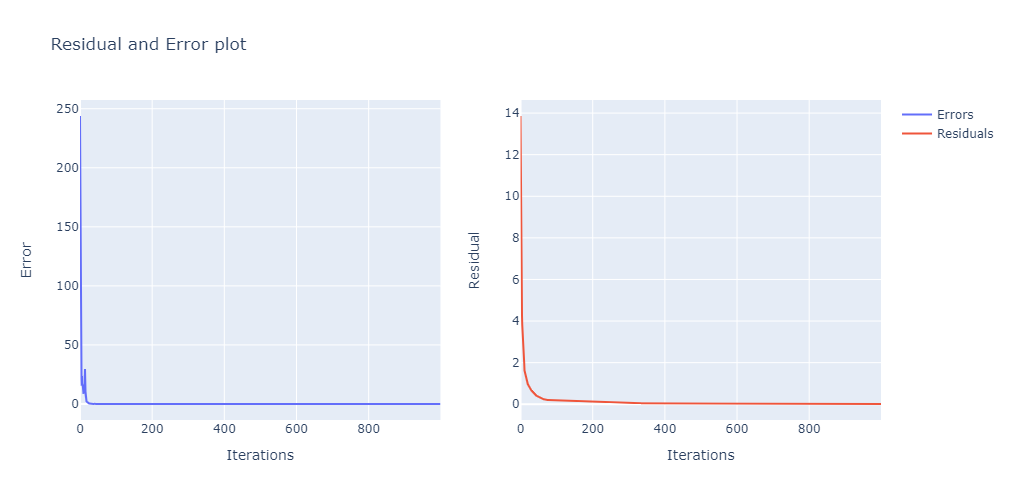

In [46]:
test_bfgs(RM_1, RV_1, method='C', verbose=False)

BFGS did not converge


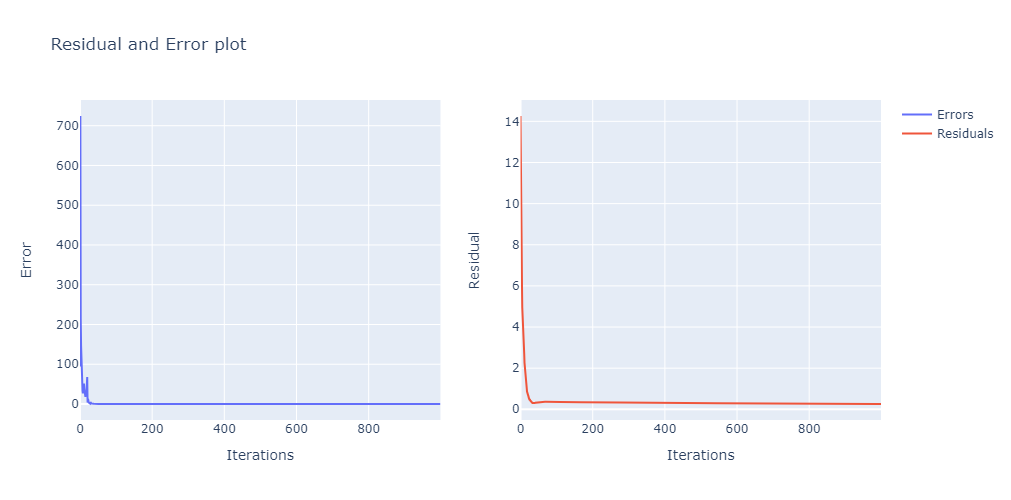

In [47]:
test_bfgs(RM_2, RV_2, method='C', verbose=False)

BFGS did not converge


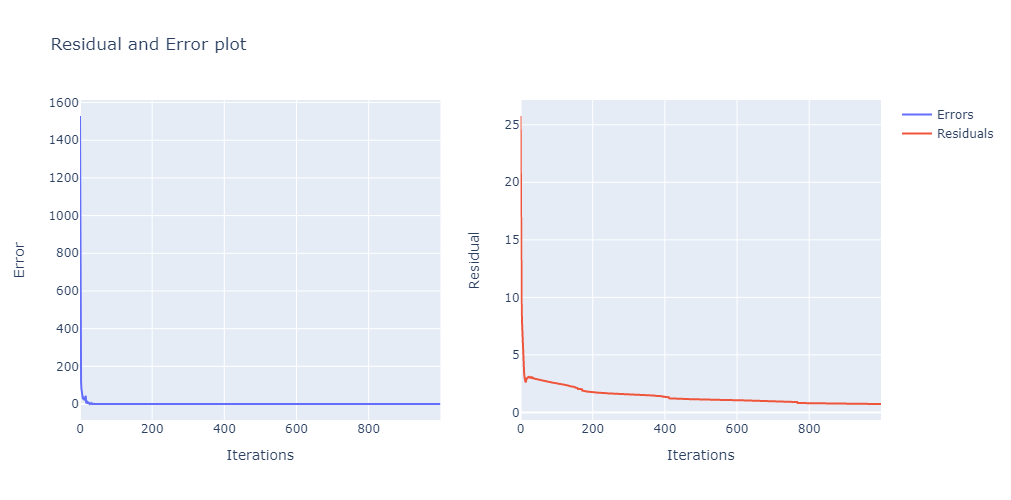

In [48]:
test_bfgs(RM_3, RV_3, method='C', verbose=False)

BFGS did not converge


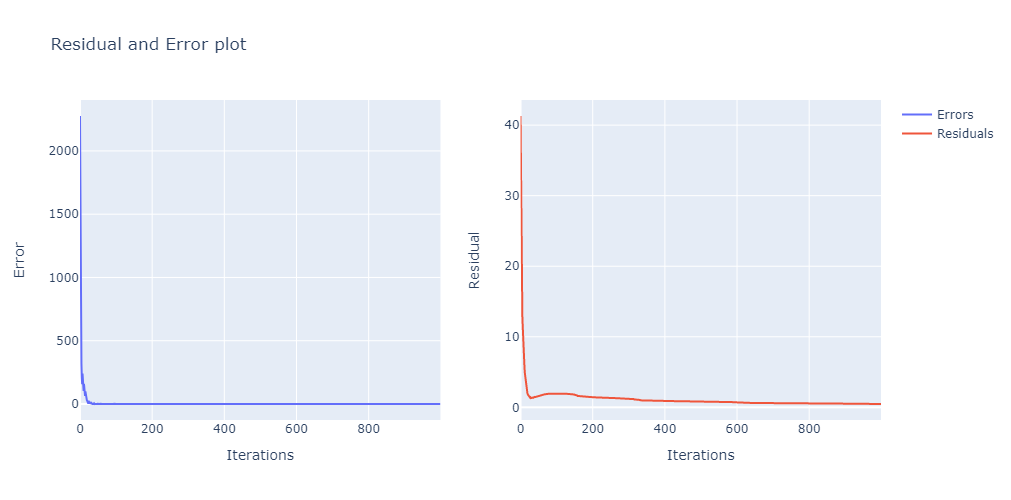

In [49]:
test_bfgs(RM_4, RV_4, method='C', verbose=False)

## Experimenting with the Line Search

### Wolfe-type Line Searches

### Armijo-type Line Searches

## Comparison